前回 (./titanic.ipynb) の予測率0.75598を超えるのを目標にする

In [2]:
import numpy as np
import pandas as pd

In [3]:
titanic = pd.read_csv('./titanic/train.csv')

まず"Cabin"を追加してみる。前回関連ありそうだと予想したものの、数値化が難しく無視していた。

In [8]:
cabins = titanic['Cabin'].dropna()
cabins

1              C85
3             C123
6              E46
10              G6
11            C103
          ...     
871            D35
872    B51 B53 B55
879            C50
887            B42
889           C148
Name: Cabin, Length: 204, dtype: object

件数は204(/891)なのでdropnaはしない

パターンを考えるのに客室の図が欲しい。

- [タイタニック号の乗客の生存予測～Kaggleに挑戦（その３） │ キヨシの命題](https://yolo-kiyoshi.com/2017/11/26/post-599/)
- [kaggleで予測モデルを構築してみた (4) - データの背景を調べる - About connecting the dots.](https://smrmkt.hatenablog.jp/entry/2013/01/04/211844)
  - 記事内にあった画像のあるサイト
    - [Plans détaillés du Titanic](https://titanic.pagesperso-orange.fr/page94.htm)
    - [タイタニック資料館](https://web.archive.org/web/20160916210428/http://homepage1.nifty.com/GOME/MOKEI/TITANIC/TIT_DOC.htm)
    - [タイタニック号データ](https://web.archive.org/web/20160924032720/http://homepage1.nifty.com/Titanic/real/danmen.htm)

In [29]:
titanic[titanic["Cabin"].str.contains(" ") == True]["Cabin"]

27         C23 C25 C27
75               F G73
88         C23 C25 C27
97             D10 D12
118            B58 B60
128              F E69
297            C22 C26
299            B58 B60
305            C22 C26
311    B57 B59 B63 B66
341        C23 C25 C27
390            B96 B98
435            B96 B98
438        C23 C25 C27
498            C22 C26
679        B51 B53 B55
699              F G63
700            C62 C64
715              F G73
742    B57 B59 B63 B66
763            B96 B98
789            B82 B84
802            B96 B98
872        B51 B53 B55
Name: Cabin, dtype: object

In [32]:
titanic[titanic["Cabin"].str.contains(" ") == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.00,3,2,19950,263.0000,C23 C25 C27,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.00,0,0,348123,7.6500,F G73,S
88,89,1,1,"Fortune, Miss. Mabel Helen",female,23.00,3,2,19950,263.0000,C23 C25 C27,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.00,0,1,PC 17759,63.3583,D10 D12,C
118,119,0,1,"Baxter, Mr. Quigg Edmond",male,24.00,0,1,PC 17558,247.5208,B58 B60,C
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S
299,300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.00,0,1,PC 17558,247.5208,B58 B60,C
305,306,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.00,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


複数人分客室取っているデータがある。近いところを取得しているので先頭を取得するか。真ん中取得の方が予測に偏りが出なくて良いかもしれないが処理面倒そうなので先頭で良いかな。

ほとんどは階層同じなので `CabinFloor` `CabinNumber` に分割するのが良いか？

`CabinNumber` の方は `DistanceFromExit` として距離に変換するのがさらに精度上がりそう。しかし船室番号までは記載されていないので断念。

`F G73` のように階層を跨いでるデータも一部ある。番号が欠落している `F ` を削除するのが良いか？

In [33]:
titanic[titanic["Cabin"].str.contains("F") == True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
66,67,1,2,"Nye, Mrs. (Elizabeth Ramell)",female,29.0,0,0,C.A. 29395,10.5000,F33,S
75,76,0,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
128,129,1,3,"Peter, Miss. Anna",female,NaN,1,1,2668,22.3583,F E69,C
148,149,0,2,"Navratil, Mr. Michel (""Louis M Hoffman"")",male,36.5,0,2,230080,26.0000,F2,S
183,184,1,2,"Becker, Master. Richard F",male,1.0,2,1,230136,39.0000,F4,S
193,194,1,2,"Navratil, Master. Michel M",male,3.0,1,1,230080,26.0000,F2,S
340,341,1,2,"Navratil, Master. Edmond Roger",male,2.0,1,1,230080,26.0000,F2,S
345,346,1,2,"Brown, Miss. Amelia ""Mildred""",female,24.0,0,0,248733,13.0000,F33,S
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
618,619,1,2,"Becker, Miss. Marion Louise",female,4.0,2,1,230136,39.0000,F4,S


F階層の人全てが番号なしではない。

In [36]:
titanic[titanic["Cabin"].str.contains("\AA|B|C|D|E|F|G") == False]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
339,340,0,1,"Blackwell, Mr. Stephen Weart",male,45.0,0,0,113784,35.5,T,S


Tってなんだろう。1件だし除外しておこう。

### Cabinの前処理

- "T"をNAに置き換え
- "F "を削除
- " "でSplit
- 先頭を取り出し
- 先頭1文字を分離
- `Floor` `CabinNumber` に分割
- `Floor` を A=1...G=7に変換


前回最終的に利用したのはこの特徴
```py
transformer = ColumnTransformer([ 
  ("num", SimpleImputer(), ["Pclass", "Parch", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex", "Embarked"]),
])
```

In [126]:
_cabins = np.array(titanic)[:, 10]
_cabins[:10]

array([nan, 'C85', nan, 'C123', nan, nan, 'E46', nan, nan, nan],
      dtype=object)

In [86]:
np.isnan(_cabins)
# _cabins = np.where(np.isnan(_titanic), None, _titanic)
# _cabins

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

strが混じると `np.isnan` に渡せないとのこと

In [191]:
def split_cabins(cabins):
  _floors = []
  _numbers = []

  for cabin in cabins.astype(str):
    if cabin == 'nan' or not cabin:
      _floors.append(np.nan)
      _numbers.append(np.nan)
      continue
    else:
      _first_cabin = cabin.split(" ")[0]
      floor = _first_cabin[0]
      number = _first_cabin[1:]
      _floors.append(floor)
      _numbers.append(number if number else np.nan)

  return _floors, np.array(_numbers, dtype=np.float64)

_floors, _numbers = split_cabins(_cabins)
_floors[:11], _numbers[:11]

([nan, 'C', nan, 'C', nan, nan, 'E', nan, nan, nan, 'G'],
 array([ nan,  85.,  nan, 123.,  nan,  nan,  46.,  nan,  nan,  nan,   6.]))

In [192]:
from sklearn.preprocessing import LabelEncoder

_enc = LabelEncoder()
_enc.fit_transform(_floors[:20])

array([3, 0, 3, 0, 3, 3, 1, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 3])

In [320]:
from sklearn.base import BaseEstimator, TransformerMixin

class CabinConverter(BaseEstimator, TransformerMixin):

  def __init__(self, cabin_ix = 0):
    self.cabin_ix = cabin_ix
    return

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    # print(X)
    _X = np.array(X)
    cabins = _X[:, self.cabin_ix]
    floors, numbers = split_cabins(cabins)
    return np.c_[np.delete(_X, self.cabin_ix, 1), floors, numbers]

In [315]:
# 2次元配列のまま取り出し
np.array(titanic)[:, 10:11][:10]

array([[nan],
       ['C85'],
       [nan],
       ['C123'],
       [nan],
       [nan],
       ['E46'],
       [nan],
       [nan],
       [nan]], dtype=object)

In [321]:
_conv = CabinConverter()
_splitted = _conv.transform(np.array(titanic)[:, 10:11])
_splitted

array([['nan', nan],
       ['C', 85.0],
       ['nan', nan],
       ...,
       ['nan', nan],
       ['C', 148.0],
       ['nan', nan]], dtype=object)

In [280]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class FloorLabelConverter(BaseEstimator, TransformerMixin):

  def __init__(self, floor_ix = 0):
    self.floor_ix = floor_ix
    return

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    floors = X[:, self.floor_ix]
    le = LabelEncoder()
    _floors = le.fit_transform(floors)
    print('categories', le.classes_)
    print('floors', _floors[:10])
    return np.c_[np.delete(X, self.floor_ix, 1), _floors]

In [271]:
_conv = FloorLabelConverter()
_labeled = _conv.transform(_splitted)
_labeled[:10]

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'nan']
floors [8 2 8 2 8 8 4 8 8 8]


array([[nan, 8],
       [85.0, 2],
       [nan, 8],
       [123.0, 2],
       [nan, 8],
       [nan, 8],
       [46.0, 4],
       [nan, 8],
       [nan, 8],
       [nan, 8]], dtype=object)

Floor=NaN も1つのカテゴリとして扱われてしまうのは都合が悪い。どうにかしてNAとして扱われるか中央値でFillされるようにしないといけない。

In [273]:
%xmode Plain

from sklearn.impute import SimpleImputer

imputer = SimpleImputer()
imputer.fit_transform(_splitted)


Exception reporting mode: Plain


ValueError: Cannot use mean strategy with non-numeric data:
could not convert string to float: 'C'

テキストに対してSimpleImputerを使うことはできない

In [294]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder

class FloorLabelConverter(BaseEstimator, TransformerMixin):

  def __init__(self, floor_ix = 0):
    self.floor_ix = floor_ix
    return

  def fit(self, X, y=None):
    return self

  def transform(self, X):
    floors = X[:, self.floor_ix]
    le = LabelEncoder()
    _floors = le.fit_transform(floors)
    print('categories', le.classes_)
    nan_label = np.where(le.classes_ == 'nan')[0][0]
    print('nan_label', nan_label)
    return np.c_[np.delete(X, self.floor_ix, 1), [np.nan if floor == nan_label else floor for floor in _floors]]

In [295]:
_conv = FloorLabelConverter()
_labeled = _conv.transform(_splitted)
_labeled[:10]

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'nan']
nan_label 8


array([[nan, nan],
       [85.0, 2.0],
       [nan, nan],
       [123.0, 2.0],
       [nan, nan],
       [nan, nan],
       [46.0, 4.0],
       [nan, nan],
       [nan, nan],
       [nan, nan]], dtype=object)

Floorの変換完了。NaNへの置き換えはもっと良い方法あるかもしれない。

In [322]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

cabin_pipeline = Pipeline([
  ('converter', CabinConverter()),
  ('label', FloorLabelConverter()),
  ('imputer', SimpleImputer(strategy="median")),
])

In [323]:
cabin_pipeline.fit_transform(np.array(titanic)[:, 10:11])

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'nan']
nan_label 8


array([[ 40.5,   2. ],
       [ 85. ,   2. ],
       [ 40.5,   2. ],
       ...,
       [ 40.5,   2. ],
       [148. ,   2. ],
       [ 40.5,   2. ]])

cabin_pipeline完成

In [301]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(titanic, test_size=0.2, random_state=39)

In [339]:
y_train = train.iloc[:, 1:2]
X_train = train.drop(y_train.columns, axis=1)

y_test = test.iloc[:, 1:2]
X_test = test.drop(y_test.columns, axis=1)

とりあえず前回良かったRandomForestを利用してみる

In [334]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

scaler_pipeline = Pipeline([
  ('imputer', SimpleImputer()),
  ('std_scaler', StandardScaler()),
])

transformer = ColumnTransformer([ 
  ("num", SimpleImputer(strategy="median"), ["Pclass", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex"]),
  ("cabin", cabin_pipeline, ["Cabin"]),
])

_X_train = transformer.fit_transform(X_train)
clf = RandomForestClassifier(random_state=38)
clf.fit(_X_train, y_train)
cross_val_score(clf, _X_train, y_train, cv=3, scoring="accuracy")

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'nan']
nan_label 7


<ipython-input-334-d63bf7fa481f>:21: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(_X_train, y_train)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

array([0.83613445, 0.80168776, 0.8649789 ])

80.1~86.4%なので結構上がった

In [340]:
_X_test = transformer.fit_transform(X_test)
cross_val_score(clf, _X_test, y_test, cv=3, scoring="accuracy")

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'nan']
nan_label 8


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.8       , 0.78333333, 0.77966102])

テストセットに対してはそこまで向上していない

In [335]:
titanic_test = pd.read_csv('./titanic/test.csv')

In [336]:
_titanic_test = transformer.fit_transform(titanic_test)
predict = clf.predict(_titanic_test)
predict

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'nan']
nan_label 7


array([0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [337]:
id = np.array(titanic_test["PassengerId"]).astype(int)
df = pd.DataFrame(predict, id, columns = ["Survived"])
df

,Survived
892,0
893,0
894,0
895,0
896,1
...,...
1305,0
1306,1
1307,0
1308,0


In [338]:
df.to_csv("./titanic/predict-2.csv", index_label = ["PassengerId"])

結果は0.75119。前回よりわずかに悪い。

In [341]:
from sklearn.neighbors import KNeighborsClassifier

_X_train = transformer.fit_transform(X_train)
knn_clf = KNeighborsClassifier()
knn_clf.fit(_X_train, y_train)
cross_val_score(knn_clf, _X_train, y_train, cv=3, scoring="accuracy")

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'nan']
nan_label 7


/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

array([0.76470588, 0.75527426, 0.80590717])

In [342]:
_X_test = transformer.fit_transform(X_test)
cross_val_score(clf, _X_test, y_test, cv=3, scoring="accuracy")

categories ['A' 'B' 'C' 'D' 'E' 'F' 'G' 'T' 'nan']
nan_label 8


/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:598: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


array([0.8       , 0.78333333, 0.77966102])

In [345]:
predict = knn_clf.predict(_titanic_test)
predict

array([0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [346]:
id = np.array(titanic_test["PassengerId"]).astype(int)
df = pd.DataFrame(predict, id, columns = ["Survived"])
df.to_csv("./titanic/predict-2-2.csv", index_label = ["PassengerId"])

この結果は 0.70334 今までより精度悪い。

## 前処理見直し
- 階数をカテゴリ化したのは正しかったのか？
  - A~Gの順になっているが、その順に助かりやすかったのか不明。例えば真ん中の階層が助かりやすい可能性もある。
    - 階数と生存の分布をチェックする
      - 線形に増減するようであればカテゴリ化したままで良い
      - ばらつきが大きいならOneHotEncodingに変更する
- 客室番号の数値をそのまま使って良かったのか？
  - 階数の情報を抜いたことで、例えばA10とF10のような、本来は遠い客室を似た特徴を持っていると判定されていないか。
    - 客室番号と生存の相関をチェックする
      - 高ければ不正解の原因の可能性
    - 階数を含んだデータ変換をする
      - 例えば `階数 * 100 + 部屋番号` のようにして、階数の影響を除外しない数値にする
        （階数にかける数値は部屋番号の最大桁数以上）
- 外れ値の除外
        

In [354]:
pd.DataFrame(_X_train)

,0,1,2,3,4,5,6
0,3.0,6.9750,1.209287,0.0,1.0,38.0,2.0
1,1.0,30.6958,0.000000,0.0,1.0,38.0,2.0
2,1.0,26.2875,0.425796,0.0,1.0,24.0,4.0
3,3.0,7.8958,0.000000,0.0,1.0,38.0,2.0
4,2.0,13.0000,0.504145,0.0,1.0,38.0,2.0
...,...,...,...,...,...,...,...
707,2.0,26.0000,1.914429,0.0,1.0,38.0,2.0
708,1.0,27.7208,0.000000,0.0,1.0,38.0,2.0
709,2.0,21.0000,-0.200996,1.0,0.0,38.0,2.0
710,3.0,7.8958,-0.122647,0.0,1.0,38.0,2.0


In [363]:
y_train

,Survived
129,0
793,0
701,1
601,0
344,0
...,...
582,0
64,0
41,0
105,0


In [372]:
_transormer = ColumnTransformer([ 
  ("num", SimpleImputer(strategy="median"), ["Pclass", "Fare"]),
  ("scale", scaler_pipeline, ["Age"]),
  ("cat", OneHotEncoder(), ["Sex"]),
  ("cabin", cabin_pipeline, ["Cabin"]),
])

_transformer.fit_transform(train)
# pd.DataFrame(_X_train, columns=["Pclass", "Fare", "AgeScaled", "Sex1", "Sex2", "CabinNumber", "CabinFloor"]).join(y_train)
# pd.concat([pd.DataFrame(_X_train, columns=["Pclass", "Fare", "AgeScaled", "Sex1", "Sex2", "CabinNumber", "CabinFloor"]), y_train])

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

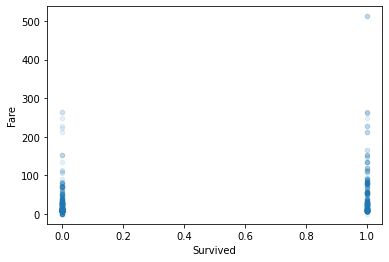

In [373]:
titanic.plot(kind="scatter", x="Survived", y="Fare", alpha=0.1)